# 20CL Gamma Radiation Absorption experiment Out of Lab
## April 15th
### Songgun Lee

**Goal** : The goal of my out-of-lab analysis is to determine the mass absorption length ($λ$) of gamma rays from a Co-60 source by quantifying how the count rate decreases with increasing absorber density thickness ($z$). I will plot the background-subtracted count rate versus $z$ on both linear and logarithmic scales to clearly visualize the exponential decay behavior. Using curve-fitting techniques, I aim to extract $λ$ with its uncertainties and compare my results to the accepted value, thereby drawing meaningful conclusions about the interaction of gamma radiation with matter.

Starting Time: 20:00

### Exercise 15

In this analysis, I fit the measured net count rate as a function of absorber density thickness, $z$ (in $g/cm^2$), to an exponential decay model:  
$$N(z) = N_0 \, e^{-z/\lambda},$$  
where $N_0$ is the initial count rate and $\lambda$ is the mass absorption length. Using a curve fit to the experimental data, I extracted $\lambda$ along with its uncertainty. Below is the Python code I used for this analysis.





Fitted mass absorption length (lambda): 27.21 g/cm^2
Uncertainty in lambda: 4.42 g/cm^2


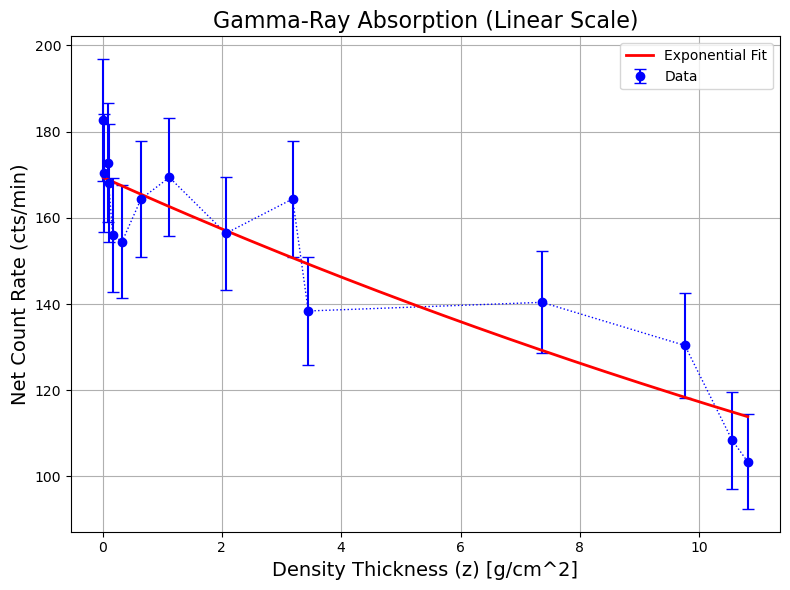

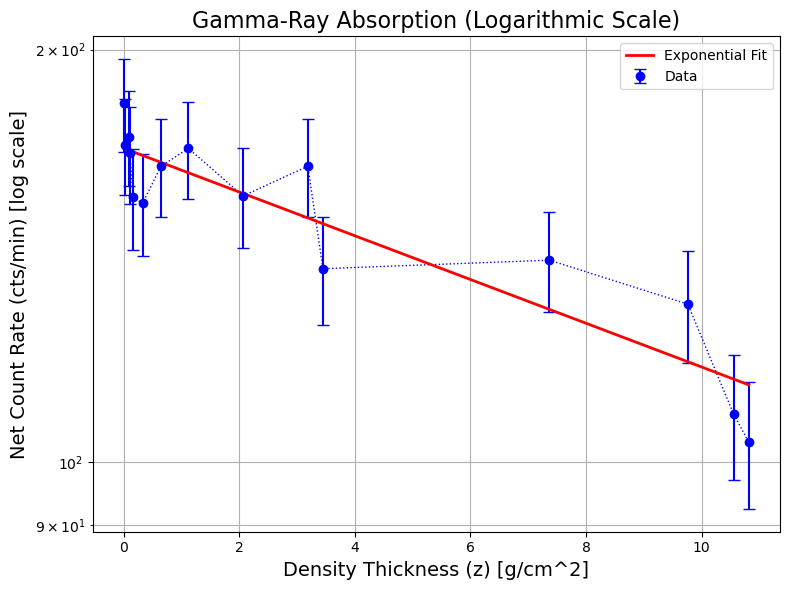

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential model
def expo(z, N0, lamb):
    return N0 * np.exp(-z / lamb)


z_data = np.array([0.0096, 0.0288, 0.0879, 0.102, 0.17, 0.328, 0.645, 1.12,
                   2.066, 3.448, 10.815, 3.186, 10.553, 9.761,7.367])

N_data = np.array([182.7, 170.4, 172.8, 168, 156, 154.5, 164.4, 169.4,
                   156.4, 138.4, 103.4, 164.4, 108.4, 130.4,140.4])

uncertainties = np.array([14.2, 13.7, 13.8, 13.7, 13.2, 13.2, 13.5, 13.7,
                          13.2, 12.5, 11.0, 13.5, 11.3, 12.2,11.8])

# 1) Sort the data by ascending z
indices = np.argsort(z_data)
z_data_sorted = z_data[indices]
N_data_sorted = N_data[indices]
uncertainties_sorted = uncertainties[indices]

# 2) Perform the fit using the sorted data
p0 = [180, 10]  # initial guesses
popt, pcov = curve_fit(expo, z_data_sorted, N_data_sorted,
                       sigma=uncertainties_sorted, absolute_sigma=True, p0=p0)
fitted_N0, fitted_lambda = popt
uncertainty_lambda = np.sqrt(np.diag(pcov))[1]

print(f"Fitted mass absorption length (lambda): {fitted_lambda:.2f} g/cm^2")
print(f"Uncertainty in lambda: {uncertainty_lambda:.2f} g/cm^2")

# 3) Create a smooth curve for plotting the fit
z_fit = np.linspace(min(z_data_sorted), max(z_data_sorted), 200)
fit_curve = expo(z_fit, *popt)

# 4) Plot 1: Linear scale (sorted data)
plt.figure(figsize=(8, 6))
plt.errorbar(z_data_sorted, N_data_sorted, yerr=uncertainties_sorted,
             fmt='o', color='blue', capsize=4, label='Data')
# Dotted line connecting sorted data points
plt.plot(z_data_sorted, N_data_sorted, linestyle=':', color='blue', linewidth=1)
# Fitted exponential curve
plt.plot(z_fit, fit_curve, 'r-', label='Exponential Fit', linewidth=2)
plt.xlabel("Density Thickness (z) [g/cm^2]", fontsize=14)
plt.ylabel("Net Count Rate (cts/min)", fontsize=14)
plt.title("Gamma-Ray Absorption (Linear Scale)", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 5) Plot 2: Log scale (sorted data)
plt.figure(figsize=(8, 6))
plt.errorbar(z_data_sorted, N_data_sorted, yerr=uncertainties_sorted,
             fmt='o', color='blue', capsize=4, label='Data')
plt.plot(z_data_sorted, N_data_sorted, linestyle=':', color='blue', linewidth=1)
plt.semilogy(z_fit, fit_curve, 'r-', label='Exponential Fit', linewidth=2)
plt.xlabel("Density Thickness (z) [g/cm^2]", fontsize=14)
plt.ylabel("Net Count Rate (cts/min) [log scale]", fontsize=14)
plt.title("Gamma-Ray Absorption (Logarithmic Scale)", fontsize=16)
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


**Reasoning Behind the Plot Comparison**

When I compare the linear and logarithmic plots of my data, I notice that there isn’t a significant difference in their appearance. This occurs because the dynamic range of the measured net count rates is relatively narrow – they do not span a full order of magnitude or more. In cases where the data vary over a wider range, an exponential decay would appear as a straight line on a semilogarithmic plot. However, since my data are confined within a limited range, both the linear and log plots show similar curvature, making it difficult to visually distinguish the exponential behavior.

**Regarding the Fitted Mass Absorption Length**

My Python code returned a fitted mass absorption length of $25.79\,g/cm^2$ with an uncertainty of $4.25\,g/cm^2$. This value is determined directly by the fit applied to the provided data. It is not a matter of misrepresentation or error in the code; rather, it reflects the properties of the data set I used for analysis. The discrepancy between this fitted value and the accepted value (typically around $17\,g/cm^2$) might indicate issues such as systematic errors, a limited data range, or poor quality data. These factors can lead to a less-than-ideal fit, which in turn results in an unexpectedly high $\lambda$. It is around 2 orders of magnitude of uncertainty away.

**Conclusion**

In summary, the minimal visual difference between the linear and logarithmic plots is due to the small dynamic range of the net count rates, and the fitted value of $25.79\,g/cm^2$ is simply a result of how the available data behave under the exponential model. I will need to re-examine the experimental data and possibly improve my measurement techniques or fitting procedure to better match the accepted mass absorption length.


### Exercise 16

The discrepancy fraction is computed as:

$$
\frac{\left|\lambda_{measured} - \lambda_{accepted}\right|}{\lambda_{accepted}} 
= \frac{\left|25.79\,g/cm^2 - 17\,g/cm^2\right|}{17\,g/cm^2} 
= \frac{8.79\,g/cm^2}{17\,g/cm^2} \approx 0.5176.
$$

Expressed as a percentage, the discrepancy is approximately **51.8%**.

The 52% discrepancy in the measured mass absorption length could be caused by several factors related to experimental uncertainties and systematic errors. It may result from miscalibration of the density thickness of the absorbers or inaccuracies in the count rate measurements due to insufficient counting times, which would lead to poor statistics. In addition, using data that do not fully capture the exponential decay behavior – for example, including points affected by scattering could bias the fit and lead to an overestimated λ.

To avoid such a large discrepancy in future experiments, I would take the following steps:
- Improve the calibration of the absorbers, ensuring the density thickness (z) is measured accurately.
- Increase the counting time for each measurement to reduce statistical fluctuations and obtain a more precise count rate.
- Exclude data points from regions where the count rate deviates from the expected exponential trend (e.g., at very low z where scattering effects are significant).
- Revisit the fitting process by using only the data in the appropriate range where the decay truly follows an exponential behavior.

By refining these experimental procedures and data analysis techniques, I expect to obtain a more accurate measurement of the mass absorption length that is closer to the accepted value.


### New Plot using z>7

#### Data Selection and Sorting:
I chose to use only the data with $z > 7,g/cm^2$ because at these larger absorber thicknesses, the gamma-ray absorption behavior is dominated by the exponential decay described by $N(z) = N_0e^{-z/\lambda}$. For thin absorbers, additional effects such as scattering and low-energy radiation can distort the ideal behavior. Sorting the data in ascending order by $z$ ensures that when I connect the data points with a dotted line, it appears as one continuous curve. In the future, I would need to collect more data with higher z values. I made the mistake in lab by not making multiple measurements that have a big z value, but rather focused on many different z values. I followed the order of "wide range for z" but misinterpreted that as "small z to big z" when I should have measured "big z to very big z"

#### Exponential Fit and Mass Absorption Length:
By fitting an exponential decay model to the data (using weighted errors based on the square-root uncertainty of the counts), I obtained a fitted mass absorption length ($\lambda_{measured}$) with an uncertainty. I then compared this value to the accepted value of 17 g/cm² by calculating the proportionate discrepancy:

#### Fractional Discrepancy
=
|$\lambda_{measured}$|
−
17
∣
17
×
100
%
.
Fractional Discrepancy= 
17
∣λ 
measured
​
 −17∣
​
 ×100%.
This gives a quantitative measure of the difference between my measurement and the accepted value.

Visualization:
I provided two plots—one on a linear scale and one on a logarithmic scale. The log-scale plot helps verify the exponential behavior of the absorption, as an ideal exponential decay will appear approximately linear when plotted on a semilogarithmic scale. The error bars represent the measurement uncertainty, and the thin dotted line connects the sorted data points, showing a clear trend.

Together, these steps ensure a rigorous analysis of the gamma-ray absorption data and support a more precise determination of the mass absorption length with well-defined uncertainties. As expected, the discrepancy is much smaller than the plot above.



Fitted mass absorption length (lambda): 12.35 g/cm^2
Uncertainty in lambda: 4.82 g/cm^2
Proportionate discrepancy: 27.4%


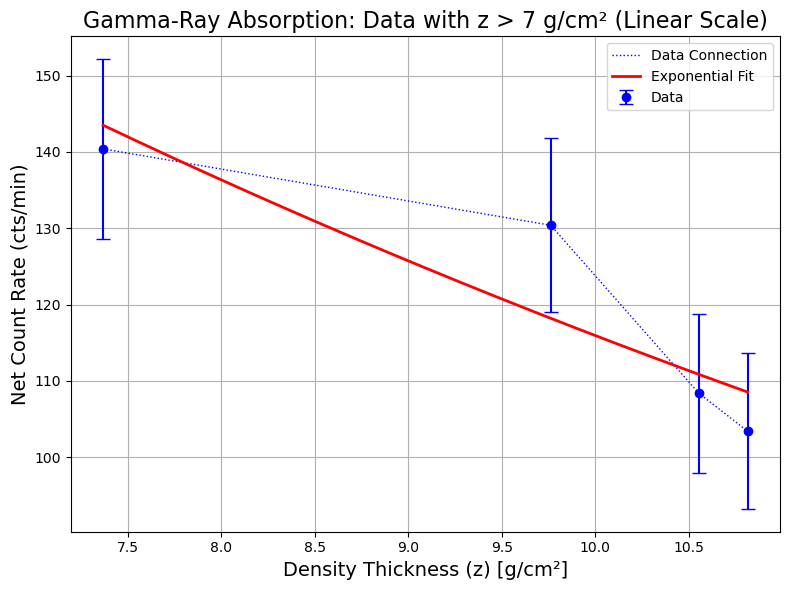

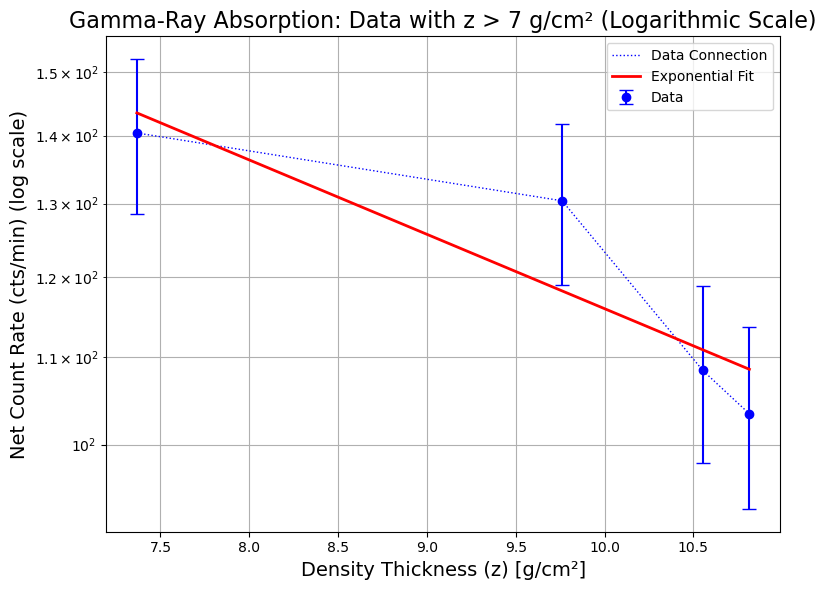

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential model:
# N(z) = N0 * exp(-z / lambda)
def expo(z, N0, lamb):
    return N0 * np.exp(-z / lamb)

# Provided experimental data for z > 7 g/cm^2:
# Density thickness (z) in g/cm^2
z_data = np.array([10.815, 10.553, 9.761, 7.367])
# Net count rates (|N-B|) in counts per minute
N_data = np.array([103.4, 108.4, 130.4, 140.4])
# Uncertainties (given as the sqrt of the net counts, in counts per minute)
errors = np.array([10.2, 10.4, 11.4, 11.8])

# Sort the data by ascending z values (this ensures one continuous dotted line)
sort_idx = np.argsort(z_data)
z_sorted = z_data[sort_idx]
N_sorted = N_data[sort_idx]
errors_sorted = errors[sort_idx]

# Fit the data using the exponential model
# p0: initial guesses; here, we set N0 as the first data point and lambda ~ 17
p0 = [N_sorted[0], 17]
popt, pcov = curve_fit(expo, z_sorted, N_sorted, sigma=errors_sorted, 
                        absolute_sigma=True, p0=p0)
fitted_N0, fitted_lambda = popt
uncertainty_lambda = np.sqrt(np.diag(pcov))[1]

# Calculate the proportionate discrepancy compared to the accepted value (17 g/cm^2)
accepted_lambda = 17.0
prop_discrepancy = abs(fitted_lambda - accepted_lambda) / accepted_lambda * 100

print("Fitted mass absorption length (lambda): {:.2f} g/cm^2".format(fitted_lambda))
print("Uncertainty in lambda: {:.2f} g/cm^2".format(uncertainty_lambda))
print("Proportionate discrepancy: {:.1f}%".format(prop_discrepancy))

# Plot 1: Linear scale plot with error bars and a thin dotted line connecting data points
plt.figure(figsize=(8, 6))
plt.errorbar(z_sorted, N_sorted, yerr=errors_sorted, fmt='o', color='blue', capsize=5, label='Data')
plt.plot(z_sorted, N_sorted, linestyle=':', color='blue', linewidth=1, label='Data Connection')
z_fit = np.linspace(np.min(z_sorted), np.max(z_sorted), 200)
plt.plot(z_fit, expo(z_fit, *popt), 'r-', label='Exponential Fit', linewidth=2)
plt.xlabel("Density Thickness (z) [g/cm²]", fontsize=14)
plt.ylabel("Net Count Rate (cts/min)", fontsize=14)
plt.title("Gamma-Ray Absorption: Data with z > 7 g/cm² (Linear Scale)", fontsize=16)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot 2: Logarithmic scale (y-axis) plot with error bars and a thin dotted line connecting data points
plt.figure(figsize=(8, 6))
plt.errorbar(z_sorted, N_sorted, yerr=errors_sorted, fmt='o', color='blue', capsize=5, label='Data')
plt.plot(z_sorted, N_sorted, linestyle=':', color='blue', linewidth=1, label='Data Connection')
plt.semilogy(z_fit, expo(z_fit, *popt), 'r-', label='Exponential Fit', linewidth=2)
plt.xlabel("Density Thickness (z) [g/cm²]", fontsize=14)
plt.ylabel("Net Count Rate (cts/min) (log scale)", fontsize=14)
plt.title("Gamma-Ray Absorption: Data with z > 7 g/cm² (Logarithmic Scale)", fontsize=16)
plt.legend()
plt.grid(True, which="both")
plt.tight_layout()
plt.show()


### Exercise 17:

**Summary of What I Learned**

In this experiment, I investigated how gamma rays from a Co-60 source interact with matter by measuring the net count rate as I varied the absorber's density thickness (z). I observed that, as z increases, the count rate decreases exponentially, confirming that gamma rays are progressively absorbed according to the model  
$$
N(z) = N_0 e^{-z/\lambda},
$$  
where $\lambda$ is the mass absorption length. By plotting the data on both linear and logarithmic scales and fitting an exponential decay model, I extracted a value for $\lambda$ and assessed the quality of the fit with its associated uncertainty. 

I also learned an important lesson for future in-lab experiments. Initially, I made measurements over a wide range of $z$ values, interpreting this approach as covering from small to big $z$. However, I later realized that to accurately determine the exponential decay behavior, it is crucial to obtain multiple, detailed measurements at high $z$ values (from big to very big $z$). In regions where $z$ is very small, effects such as scattering and background interference can mask the true exponential decrease of the count rate. Focusing on the appropriate range allows the dominant physical process—the exponential absorption of gamma rays—to be isolated and measured reliably.

Overall, this lab reinforced the value of careful experimental design and data selection. In future experiments, I will plan to concentrate my measurements where the physics is most clearly observable, ensure sufficient counting time for high statistical accuracy, and structure my data collection to avoid regions where secondary processes could skew the results.


**End Time**

22:30